## Spark cluster intro Air quality examples

### Initialization
Create and attach cluster created in databricks. 12.2 LTS (includes Apache Spark 3.3.2, Scala 2.12) 

In [0]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
spark = SparkSession.builder.getOrCreate()

In [0]:
from pyspark.sql.functions import col, mean
import pandas as pd

### Reading data from AWS S3

Now we can read a small sample of data:

In [0]:
smog_df = spark.read.json("s3a://zad2-2385734987384989347t803478/*")

In [0]:
smog_df.printSchema()

root
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- location: string (nullable = true)
 |-- mobile: boolean (nullable = true)
 |-- parameter: string (nullable = true)
 |-- sourcename: string (nullable = true)
 |-- sourcetype: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- value: double (nullable = true)



### Simple queries

In [0]:
smog_df.count()

Out[5]: 100000000

In [0]:
smog_df.select('parameter').distinct().toPandas()

,parameter
0,bc
1,so2
2,co
3,o3
4,pm10
5,no2
6,pm25


In [0]:
smog_df.select('parameter').distinct().toPandas()

,parameter
0,bc
1,so2
2,co
3,o3
4,pm10
5,no2
6,pm25


In [0]:
from pyspark.sql.functions import col, asc, desc, max

In [0]:
smog_df.filter(col('country')=='PL').select('city').distinct().toPandas()

,city
0,Żyrardów
1,Belsk
2,Legionowo
3,Radom
4,Siedlce
5,Piastów
6,Warszawa
7,Płock
8,Granica
9,Otwock


### Some more interesting statistics

In [0]:
max_pm10 = smog_df.filter(col('parameter')=='pm10')\
            .filter(col('value')>0.0)\
            .filter(col('country')=='PL')\
            .groupBy('city').agg(max('value').alias('maxpm10'))\
            .sort(col('maxpm10').desc())

In [0]:
pd_pm10 = max_pm10.limit(10).toPandas()

In [0]:
pd_pm10

,city,maxpm10
0,Siedlce,553.5
1,Otwock,520.8
2,Warszawa,453.7
3,Belsk,377.8
4,Radom,290.4
5,Żyrardów,255.0
6,Płock,178.0


In [0]:
import matplotlib.pyplot as plt

Out[14]: <AxesSubplot:ylabel='city'>

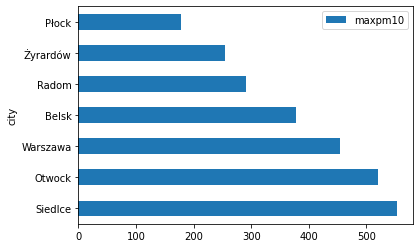

In [0]:
pd_pm10.plot.barh(x = 'city')

### Zadanie 1

[1p.] Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm25” było wyższe niż średnie stężenie w Paryżu (w całym badanym okresie). Wyniki posortuj malejąco po stężeniu pm25.


In [0]:
from pyspark.sql.functions import col, asc, desc, min, max, avg, hour, date_format, when, substring

In [0]:
avg_pm25_paris = smog_df.filter(col('parameter') == 'pm25').filter(col('city') == 'Paris').groupby("city").agg(avg('value').alias('pm25'))

In [0]:
avg_pm25_poland = smog_df.filter(col('parameter') == 'pm25')\
    .filter(col('country') == 'PL')\
    .groupby('city').agg(avg('value').alias('avgpm25'))\
    .filter(col('avgpm25') > avg_pm25_paris.toPandas()['pm25'].get(0))\
    .sort(col('avgpm25').desc()).toPandas()

In [0]:
avg_pm25_poland

,city,avgpm25
0,Otwock,43.437584
1,Legionowo,30.980099
2,Siedlce,27.798031
3,Piastów,24.619989
4,Radom,23.975480
5,Warszawa,22.767612
6,Żyrardów,21.864097
7,Płock,19.011817


### Zadanie 2

[1p.] Znajdź dla każdego kraju miasto o najniższym średnim stężeniu PM10. 
Następnie z tych miast wybierz to, które ma najwyższą średnią wartość stężenia PM10. 
Przedstaw miasto i kraj z którego pochodzi najwyzszy wynik z uzyskanych obliczeń.


In [0]:
smog_df.show(10)

+-------+-------+--------------------+------+---------+----------+----------+-----+-----+
|   city|country|            location|mobile|parameter|sourcename|sourcetype| unit|value|
+-------+-------+--------------------+------+---------+----------+----------+-----+-----+
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 11.2|
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 29.1|
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 15.0|
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 36.3|
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 21.8|
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 43.9|
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 17.9|
|Beijing|     CN|SPARTAN - Tsinghu...| false|     pm25|   Spartan|  research|µg/m³| 24.8|
|Beijing| 

In [0]:
df_countries = smog_df.filter(col('parameter') == 'pm10')\
    .select('country','city','value')\
    .groupby('country','city').agg(avg('value').alias('avg_value'))

In [0]:
df_countries.show(10)

+-------+--------------------+------------------+
|country|                city|         avg_value|
+-------+--------------------+------------------+
|     BR|          Araraquara|28.650975228376264|
|     NL|              Velsen|-49.96493263631261|
|     TH|        Samut Sakhon| 45.95988894571491|
|     US|Greensboro-High P...|11.031193915049995|
|     TW|              南投縣| 48.29286798179059|
|     US|            FLATHEAD|19.297399917457696|
|     DE| Nordrhein-Westfalen| 17.21895105847117|
|     IN|             Kolkata|108.12000659498223|
|     US|              Topeka| 19.80150839904011|
|     US|            Stockton|23.152580403889303|
+-------+--------------------+------------------+
only showing top 10 rows



In [0]:
df_countries_min = df_countries.alias("c1")\
    .select('c1.country','c1.city','avg_value')\
    .groupby('country').agg(min('avg_value').alias('min_value'))\
    .join(df_countries.alias('c2'), (col('c2.country') == col('c1.country')) & (col('avg_value') == col('min_value')))\
    .select('c2.country', 'c2.city', 'min_value')\
    .sort(col('min_value').desc()).toPandas()

In [0]:
df_countries_min.head(1)

,country,city,min_value
0,PE,Lima,80.093523


### Zadanie 3

[1p.] Znajdź ranking miast w Europie pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. 
Podpowiedź: Wykorzystaj window functions oraz `rlike`


In [0]:
european_countries = set(['LT', 'FI', 'NL', 'PL', 'MK', 'AT', 'RU', 'AD', 'HR', 'CZ', 'PT', 'ES', 'TR', 'GB', 'MT', 'DE', 'BH', 'IT', 'FR', 'CH', 'GI', 'BA', 'SE', 'SK', 'LV', 'XK', 'HU', 'SI', 'KW', 'IE', 'BE', 'NO', 'LU', 'DK'])

In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
N = 1
rank = smog_df.filter(col('parameter')=='pm25')\
    .filter(col('country').isin(european_countries))\
    .withColumn("rank", row_number().over(Window.partitionBy("city").orderBy(desc("value"))))\
    .filter(col('rank') <= N)\
    .groupBy("city").agg(avg("value").alias("average_pm25"))\
    .sort(col('average_pm25').desc())\
    .show()

+--------------------+------------+
|                city|average_pm25|
+--------------------+------------+
|              Bayern|     2055.18|
| Nordrhein-Westfalen|    1290.858|
|                 ORA|     1271.73|
|               Loire|     1053.53|
|CCAA Cast. la Mancha|       998.0|
|       CCAA Asturias|       994.0|
|            Albacete|       989.0|
|          Val-d'Oise|       985.0|
|  ATMO FRANCHE COMTE|       985.0|
|         AIR NORMAND|       985.0|
|ATMO NOUVELLE-AQU...|       985.0|
|         Kuwait City|       985.0|
|      Seine-Maritime|       985.0|
|ATMO BOURGOGNE-FR...|      982.73|
|               AIRAQ|       977.5|
|ATMOSF'AIR BOURGOGNE|      975.08|
|               Paris|      967.98|
|     AIR RHONE ALPES|       891.0|
|ATMO AUVERGNE-RH�...|      877.05|
|              Manama|       866.0|
+--------------------+------------+
only showing top 20 rows



### Zadanie 4

[1p.] Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju. Do pozyskania danych o współrzędnych geograficznych można użyć biblioteki geopy.


In [0]:
from pyspark.sql.functions import substring
from pyspark.sql.column import Column
 
def left(col, n):
    assert isinstance(col, (Column, str))
    assert isinstance(n, int) and n >= 0
    return substring(col, 0, n)
 
def right(col, n):
    assert isinstance(col, (Column, str))
    assert isinstance(n, int) and n >= 0
    return substring(col, -n, n)


In [0]:
country_codes = spark.read.load("/FileStore/tables/countries_codes_and_coordinates-1.csv",
                     format="csv", sep=",", inferSchema="true", header="true")
 
cc=country_codes.select('Alpha-2 code','Alpha-3 code').withColumnRenamed('Alpha-2 code', 'A2').withColumnRenamed('Alpha-3 code', 'A3')

In [0]:
cc.head(10)

Out[58]: [Row(A2='AF', A3='AFG'),
 Row(A2='AL', A3='ALB'),
 Row(A2='DZ', A3='DZA'),
 Row(A2='AS', A3='ASM'),
 Row(A2='AD', A3='AND'),
 Row(A2='AO', A3='AGO'),
 Row(A2='AI', A3='AIA'),
 Row(A2='AQ', A3='ATA'),
 Row(A2='AG', A3='ATG'),
 Row(A2='AR', A3='ARG')]

In [0]:
cc=cc.select(left(right(cc.A2,3), 2).alias('A2'),left(right(cc.A3,4), 3).alias('A3'))

In [0]:
import plotly.express as px
 
df_wizu=smog_df.join(cc, smog_df.country == cc.A2,"inner")
 
grouped_data = df_wizu.filter(col('parameter')=='pm25')\
    .groupBy('A3') \
    .agg(avg('value').alias('avg_pm25'))
 
pandas_df = grouped_data.toPandas()
 
fig = px.choropleth(pandas_df, locations="A3",
                    locationmode='ISO-3',
                    color="avg_pm25", 
                    hover_name="A3")
 
fig.show()
 
fig.write_html("animated_map.html")

### Zadanie 5

[1p.] Stwórz własne nietrywialne zapytanie . Załącz wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.


In [0]:
df_pd10_min = smog_df.filter((col('parameter') == 'pm10') & (col('country') == 'US'))\
    .select('country','city','value')\
    .groupby('country','city').agg(min('value').alias('min_value'))\
    .sort(col('min_value'))

In [0]:
df_pd10_min.toPandas().head(5)

,country,city,min_value
0,US,New York-Northern New Jersey-Long Island,-256.0
1,US,Phoenix-Mesa-Scottsdale,-164.0
2,US,UNION,-51.0
3,US,MONO,-50.0
4,US,CUSTER,-30.0
